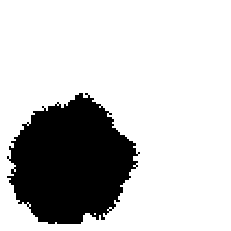

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to create a microbe image in my data structure
def create_image(n,m, density):
    microbe_size = int(n*m*density)
    image = [[0 for _ in range(n)] for _ in range(m)]
    my_image = []
    expandable_sites = []
    
    start_site = (random.randint(m//5, (4*m)//5), random.randint(n//5, (4*n)//5))
    image[start_site[0]][start_site[1]] = 1 
    my_image.append(start_site)
    expandable_sites.append(start_site)



    R = [-1,-1,-1,0,0,1,1,1]
    C = [-1,0,1,-1,1,-1,0,1]
    while (microbe_size>0):
        idx = random.randint(len(expandable_sites)*(4//5), len(expandable_sites)-1)
        a, b = expandable_sites[idx]
        next_expandable_sites = []
        for i in range(8):
            if a+R[i]>=0 and a+R[i]<m and b+C[i]>=0 and b+C[i]<n and image[a+R[i]][b+C[i]] == 0:
                next_expandable_sites.append((a+R[i],b+C[i]))
        if next_expandable_sites==[]:
            expandable_sites.pop(idx)
        else:
            next_expanded_site = random.choice(next_expandable_sites)
            image[next_expanded_site[0]][next_expanded_site[1]] = 1 
            my_image.append(next_expanded_site)
            expandable_sites.append(next_expanded_site)
            
            microbe_size -= 1
    my_image.sort()

    return image, my_image

# Function to show a microbe image
def matrix_to_image(matrix):
    plt.imshow(matrix, cmap='binary', interpolation='nearest')
    plt.axis('off')  
    plt.show()


# Example usage:
image, my_image = create_image(100, 100, 0.25)
matrix_to_image(image)
    

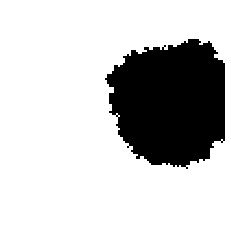

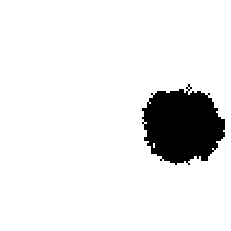

Parasite has cancer


In [36]:
# given Microscope image and Dye image detects whether a parasite has cancer or not
def cancer_detection(Microscope_image, DyeSensor_image):
    count = 0
    for i in range(len(Microscope_image)):
        a, b = Microscope_image[i]
        for j in range(len(DyeSensor_image)):
            c, d = DyeSensor_image[j]
            if a == c and b == d:
                count += 1
                break

    if (count >= 0.1*len(Microscope_image)):
        print("Parasite has cancer")
    else:
        print("Parasite doesn't have cancer")

# Example usage:
image1, Microscope_image  = create_image(100, 100, 0.25)
image2, DyeSensor_image = create_image(100, 100, 0.10)
matrix_to_image(image1)
matrix_to_image(image2)

cancer_detection(Microscope_image, DyeSensor_image)


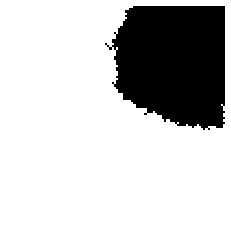

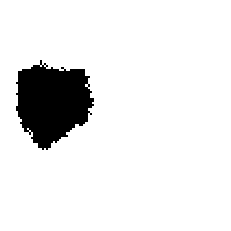

Parasite doesn't have cancer


In [37]:
# optimisation of above cancer_detection function
def cancer_detection_opt(Microscope_image, DyeSensor_image):
    count = 0
    i = 0
    j = 0
    while i < len(Microscope_image) and j < len(DyeSensor_image):
        a, b = Microscope_image[i]
        c, d = DyeSensor_image[j]
        if a == c and b == d:
            count += 1
            i += 1
            j += 1
        elif a < c or (a == c and b < d):
            i += 1
        else:
            j += 1
    if (count >= 0.1*len(Microscope_image)):
        print("Parasite has cancer")
    else:
        print("Parasite doesn't have cancer")

# Example usage:
image1, Microscope_image  = create_image(100, 100, 0.25)
image2, DyeSensor_image = create_image(100, 100, 0.10)
matrix_to_image(image1)
matrix_to_image(image2)

cancer_detection_opt(Microscope_image, DyeSensor_image)
